<a href="https://colab.research.google.com/github/sherwinl24/Assignment_1_CV_Public/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [10]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Image from RGB channels using cv2_imshow function


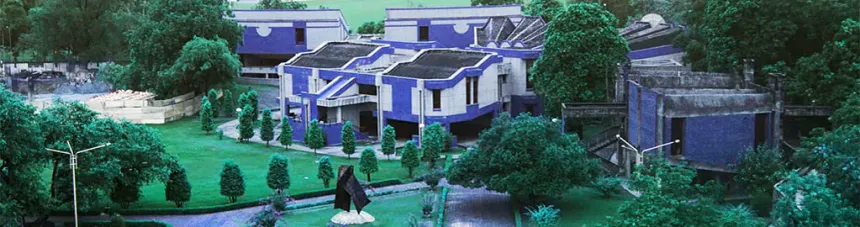

Image from BGR channels using cv2_imshow function


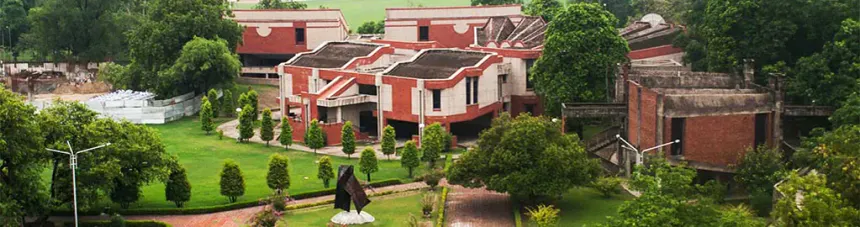

Image from RGB channels using plt


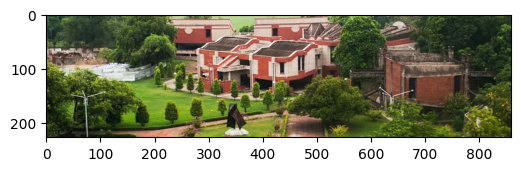

Greyscale image from averaging values from 3 channels (imshow function)


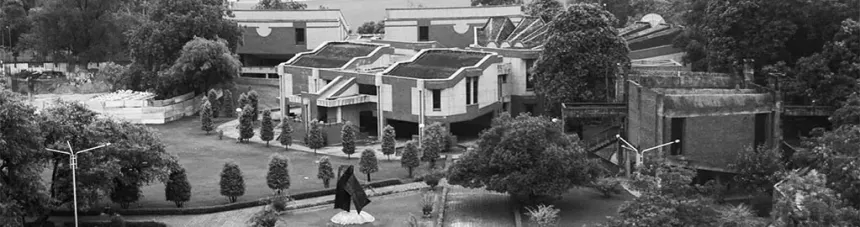

Greyscale image from cvtColor function (imshow function)


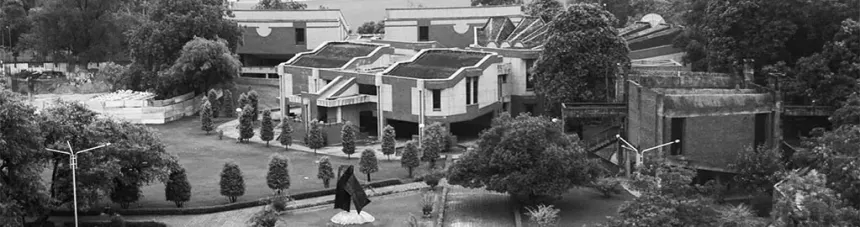

Shape of matrix of RGB channels: (227, 860, 3) 
 The Shape of Greyscale image: (227, 860)
First few intensity values of pixels in RGB image 
 [[[ 59  84  66]
  [ 40  66  48]
  [ 36  62  42]
  [ 50  77  52]
  [ 82 109  82]]

 [[ 66  91  73]
  [ 53  78  61]
  [ 41  67  47]
  [ 38  64  39]
  [ 67  94  67]]

 [[ 57  83  65]
  [ 39  64  47]
  [ 45  71  50]
  [ 69  96  71]
  [ 67  94  67]]

 [[ 47  73  55]
  [ 45  70  52]
  [ 55  81  61]
  [ 73  99  74]
  [ 81 108  81]]

 [[ 55  81  63]
  [ 45  70  52]
  [ 62  88  68]
  [ 73  99  74]
  [ 64  92  64]]]
First few intensity values of pixels in Greyscale image 
 [[74 56 52 66 98]
 [81 69 57 53 83]
 [73 55 61 85 83]
 [63 60 71 88 97]
 [71 60 78 88 80]]
Pixel sample of image taken


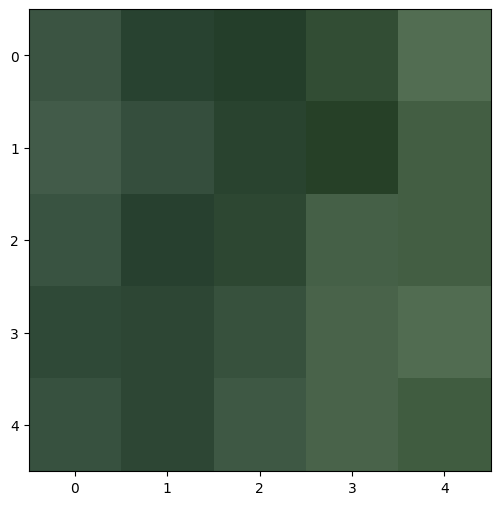

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img_bgr=cv2.imread("/iit-kanpur-kanpur-uttar-pradesh-banner.webp")
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
print("Image from RGB channels using cv2_imshow function")
cv2_imshow(img_rgb)
print("Image from BGR channels using cv2_imshow function")
cv2_imshow(img_bgr)
print("Image from RGB channels using plt")
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.show()
img_grey_1=0.299*(img_rgb[:,:,0])+0.587*img_rgb[:,:,1]+0.114*img_rgb[:,:,2]
print("Greyscale image from averaging values from 3 channels (imshow function)")
cv2_imshow(img_grey_1)
img_grey_2=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
print("Greyscale image from cvtColor function (imshow function)")
cv2_imshow(img_grey_2)
print("Shape of matrix of RGB channels:",np.shape(img_rgb),'\n',"The Shape of Greyscale image:",np.shape(img_grey_2))
print("First few intensity values of pixels in RGB image",'\n',img_rgb[:5,:5,:])
print("First few intensity values of pixels in Greyscale image",'\n',img_grey_2[:5,:5])
print("Pixel sample of image taken")
plt.figure(figsize=(6,6))
plt.imshow(img_rgb[:5,:5])
plt.show()

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [12]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

/usr/local/lib/python3.12/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


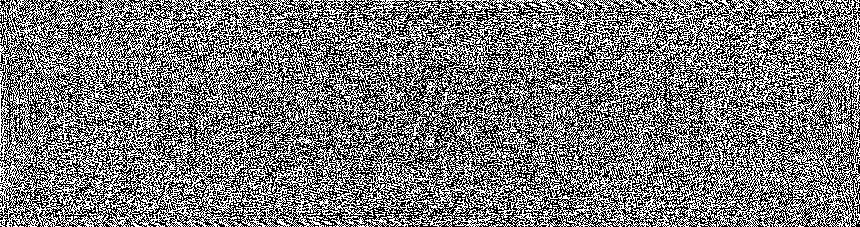

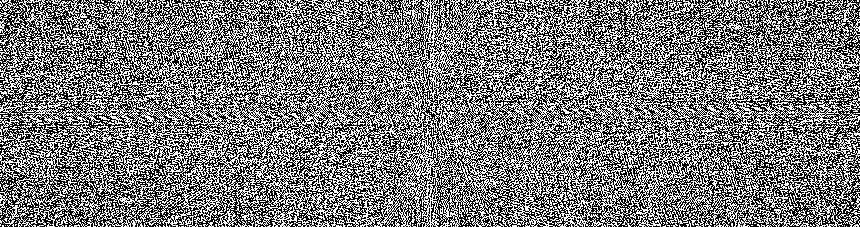

In [13]:
#Part B1
img_grey_float=img_grey_2.astype(np.float32)
img_fft=np.fft.fft2(img_grey_float)
cv2_imshow(img_fft)
img_fft_shift=np.fft.fftshift(img_fft)
print(' ')
cv2_imshow(img_fft_shift)

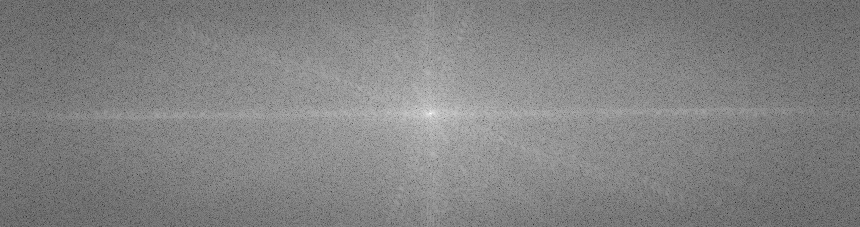

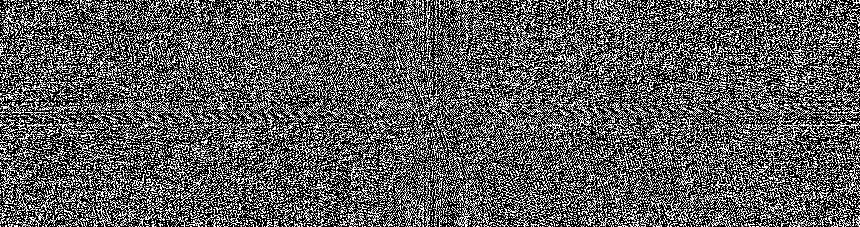

In [14]:
#Part B2
magnitude=np.log(np.abs(img_fft_shift)+1)*16
phase=np.angle(img_fft_shift)*150
cv2_imshow(magnitude)
print(' ')
cv2_imshow(phase)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [15]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Mask of Radius 10


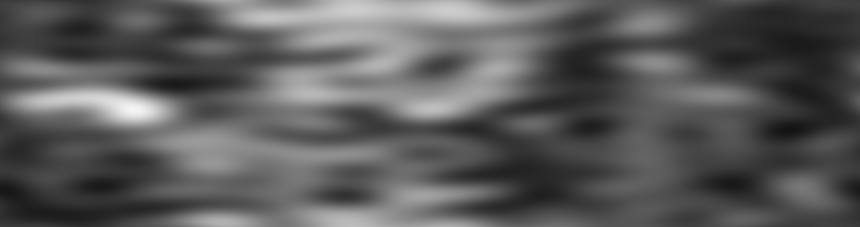

Mask of Radius 30


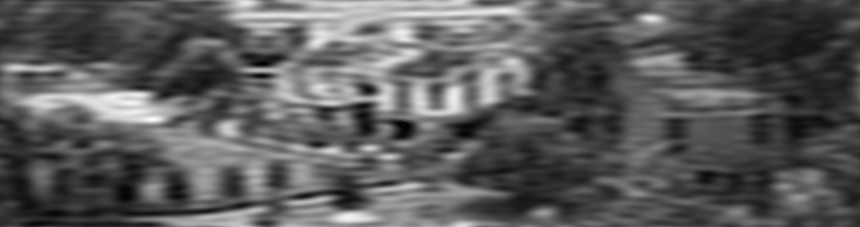

Mask of Radius 80


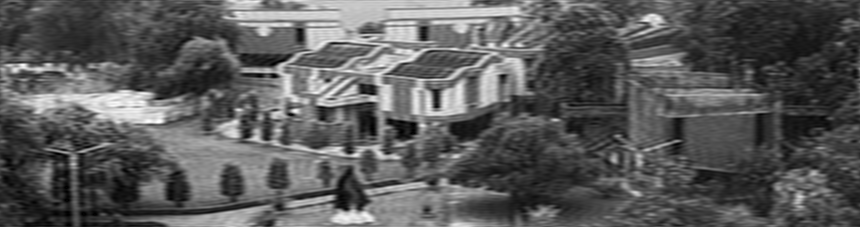

In [16]:
#Part C1
#Mask of Radius 10
shape=np.shape(img_grey_2)
mask_lpf_10=np.zeros(shape,dtype=np.uint8)
cv2.circle(mask_lpf_10,(shape[1]//2,shape[0]//2),10,1,-1)
#Mask of Radius 30
mask_lpf_30=np.zeros(shape,dtype=np.uint8)
cv2.circle(mask_lpf_30,(shape[1]//2,shape[0]//2),30,1,-1)
#Mask of Radius 80
mask_lpf_80=np.zeros(shape,dtype=np.uint8)
cv2.circle(mask_lpf_80,(shape[1]//2,shape[0]//2),80,1,-1)
#Applying to img_fft_shift
img_lpf_10=img_fft_shift*mask_lpf_10  #Radius 10
img_lpf_30=img_fft_shift*mask_lpf_30  #Radius 30
img_lpf_80=img_fft_shift*mask_lpf_80  #Radius 80
#Inverse shifting and Inverse fft
def ifft(img):
  img_shift=np.fft.ifftshift(img)
  img_back_lpf=np.fft.ifft2(img_shift)
  img_back_lpf=np.abs(img_back_lpf)
  return img_back_lpf
img_back_lpf_10=ifft(img_lpf_10)
img_back_lpf_30=ifft(img_lpf_30)
img_back_lpf_80=ifft(img_lpf_80)
print("Mask of Radius 10")
cv2_imshow(img_back_lpf_10)
print("Mask of Radius 30")
cv2_imshow(img_back_lpf_30)
print("Mask of Radius 80")
cv2_imshow(img_back_lpf_80)
#The Image after applying the mask of increasing radius shows sharper and better defined images,This is due to the fact that as we increase the radius of the mask, this includes more high frequencies which corresponds to finer details and textures


Mask of Radius 10


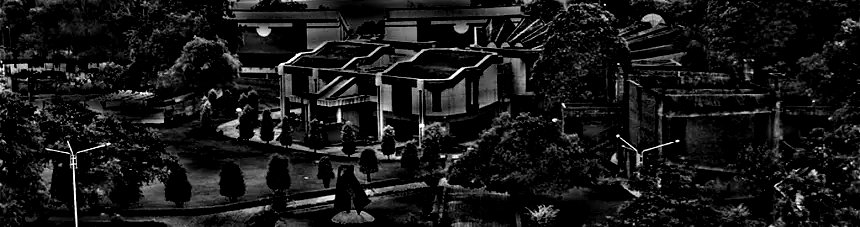

Mask of Radius 30


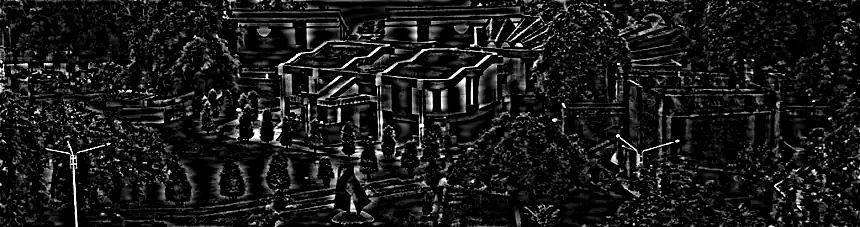

Mask of Radius 80


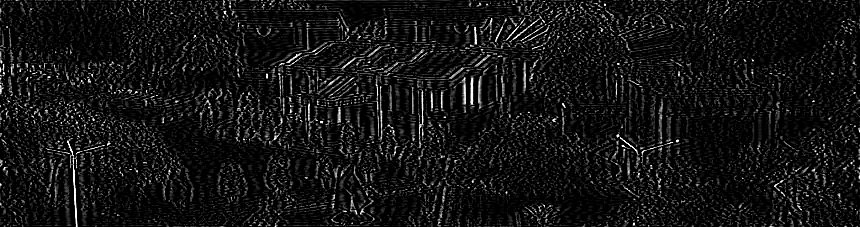

In [44]:
#Part C2
#Mask of Radius 10
mask_hpf_10=1-mask_lpf_10
#Mask of Radius 30
mask_hpf_30=1-mask_lpf_30
#Mask of Radius 80
mask_hpf_80=1-mask_lpf_80
#Applying to img_fft_shift
img_hpf_10=img_fft_shift*mask_hpf_10  #Radius 10
img_hpf_30=img_fft_shift*mask_hpf_30  #Radius 30
img_hpf_80=img_fft_shift*mask_hpf_80  #Radius 80
#Inverse shifting and Inverse fft
def ifft(img):
  img_shift=np.fft.ifftshift(img)
  img_back_hpf=np.fft.ifft2(img_shift)
  img_back_lpf=np.abs(img_back_hpf)
  return img_back_hpf
img_back_hpf_10=ifft(img_hpf_10)
img_back_hpf_30=ifft(img_hpf_30)
img_back_hpf_80=ifft(img_hpf_80)
print("Mask of Radius 10")
cv2_imshow(img_back_hpf_10*2)
print("Mask of Radius 30")
cv2_imshow(img_back_hpf_30*3)
print("Mask of Radius 80")
cv2_imshow(img_back_hpf_80*4)

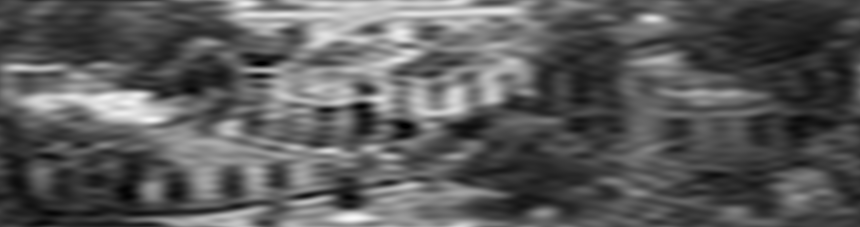

In [38]:
#Part C3
mask_square_side_50=np.zeros(shape,dtype=np.uint8)
cv2.rectangle(mask_square_side_50,(shape[1]//2-25,shape[0]//2-25),(shape[1]//2+25,shape[0]//2+25),1,-1)
img_square_side_50=img_fft_shift*mask_square_side_50
img_back_square_side_50=ifft(img_square_side_50)
cv2_imshow(img_back_square_side_50)

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

phase_only fft image


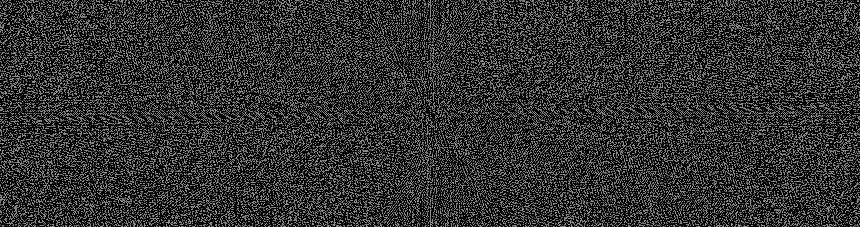

phase fft image


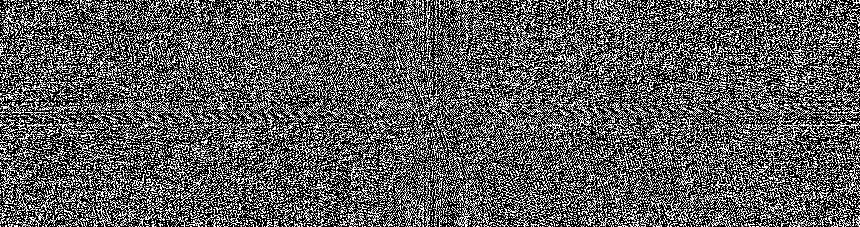

Reconstruction of image from phase_only matrix


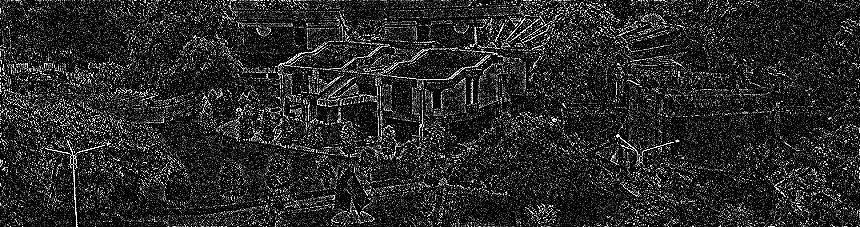

Reconstruction of image from phase matrix


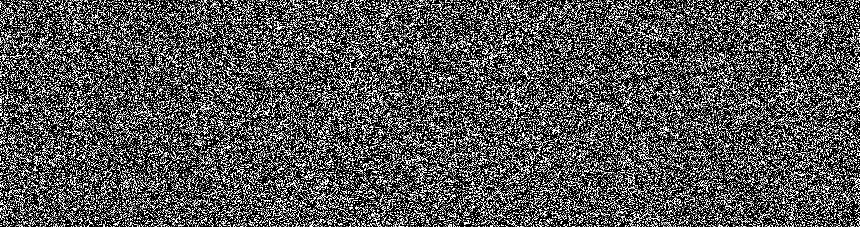

In [53]:
#Part D1
phase_only = img_fft_shift / np.abs(img_fft_shift)
print("phase_only fft image")
cv2_imshow(phase_only*150)
phase=np.angle(img_fft_shift)
print("phase fft image")
cv2_imshow(phase*150)
ifft_phase_only=ifft(phase_only)
print("Reconstruction of image from phase_only matrix")
cv2_imshow(ifft_phase_only*50000)
ifft_phase=ifft(phase)
print("Reconstruction of image from phase matrix")
cv2_imshow(ifft_phase*500000000000)
#The Reconstruction from phase_only image results in an incomplete original image because while the magnitude of frequencies have changed the arguement of the phase_only matrix still resembles the original fft matrix, thus only the arrangement of the image has been preserved,whereas the reconstruction from the phase matrix results in a random image due to the fact that it is only a real matrix containing arguments of teh complex numbers of the fft matrix

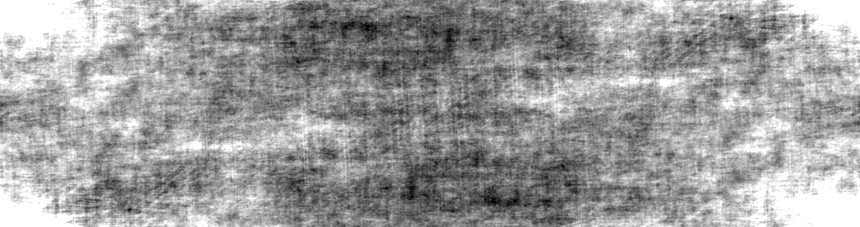

In [65]:
#Part D2
mag_only = np.abs(img_fft_shift)
img_mag_only=ifft(mag_only)
cv2_imshow(img_mag_only*1.8)
#Reconstruction from magnitude only matrix results in a image nowhere close to the original image due to the fact that information regarding the complex numbers(arguments) are lost

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

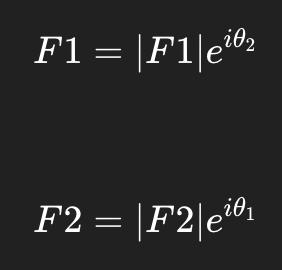

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.